In [1]:
using LinearAlgebra
import Plots as plt

include("../lib/test_functions.jl")
import .TestFunctions: wheeler

include("../lib/gif.jl")

plot_animation (generic function with 1 method)

In [2]:
f, ∇f = wheeler(1.5)
xdomain = LinRange(0, 3, 100)
ydomain = LinRange(0, 3, 100)

plotsize = (360, 360)

function plot_contour_and_mesh(mesh::Vector{Vector{Float64}}; size=plotsize)
  plot = plt.contour(xdomain, ydomain, (x, y) -> f([x, y]); colorbar=false, levels=5)
  center_x, center_y = mesh[1]
  for (fringe_x, fringe_y) in mesh[2:end]
    plt.plot!(plot, [center_x, fringe_x], [center_y, fringe_y]; color=:green, marker=(:circle, 4, :green), markeralpha=0.6, legend=false)
  end
  return plot
end

plot_contour_and_mesh (generic function with 1 method)

Optimum: [1.0, 1.5]


┌ Info: Saved animation to 
│   fn = /tmp/jl_cLUXAD0tIv.gif
└ @ Plots /home/nguymin4/.julia/packages/Plots/yJrrq/src/animation.jl:137


Plots.AnimatedGif("/tmp/jl_cLUXAD0tIv.gif")
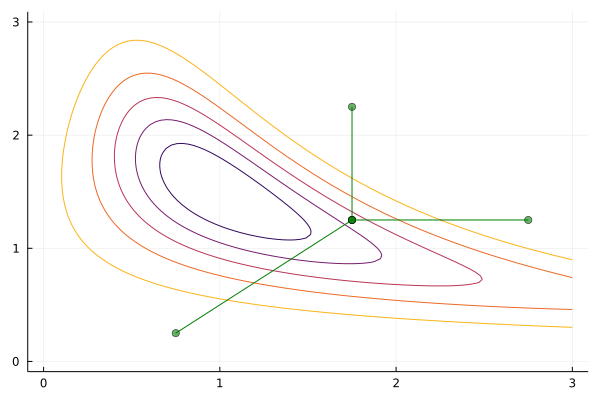

In [3]:
using Random

Random.seed!(4)

function rand_positive_spanning_set(α::Float64, n::Int64)::Vector{Vector{Float64}}
  δ = round(Int, 1/sqrt(α))
  L = Matrix(Diagonal(δ * rand([-1, 1], n)))
  for j in 1:n-1
    for i in j+1:n
      L[i,j] = rand(-δ+1:δ-1)
    end
  end
  D = L[randperm(n),:]
  D = L[:,randperm(n)]
  D = hcat(D, -sum(D, dims=2))
  return [D[:,i] for i in 1:n+1]
end

function mesh_adaptive_direct_search(f, x0::Vector{Float64}; max_iter=20, ϵ=1e-3)
  traces = []
  x, y = x0, f(x0)
  α, n, iter = 1.0, length(x0), 1
  while iter <= max_iter && α > ϵ
    improved = false
    spanning_set = rand_positive_spanning_set(α, n)
    push!(traces, append!([x], [x + α * d for d in spanning_set]))
    for d in spanning_set
      x_hat = x + α * d
      y_hat = f(x_hat)
      if y_hat < y
        x, y, improved = x_hat, y_hat, true
        x_hat = x + 3α*d
        y_hat = f(x_hat)
        if y_hat < y
          x, y = x_hat, y_hat
        end
        break
      end
    end
    α = improved ? min(1, 4 * α) : α / 4
    iter += 1
  end
  return traces, x
end

traces, x = mesh_adaptive_direct_search(f, [1.75, 1.25]; max_iter=20, ϵ=5e-4)
println("Optimum: $x")
plot_animation(plot_contour_and_mesh, traces)